In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

plt.figure().set_figwidth(50)

<Figure size 5000x480 with 0 Axes>

In [3]:
data_1 = pd.read_csv("cc_institution_details.csv")

data_1.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [4]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   unitid                                3798 non-null   int64  
 2   chronname                             3798 non-null   object 
 3   city                                  3798 non-null   object 
 4   state                                 3798 non-null   object 
 5   level                                 3798 non-null   object 
 6   control                               3798 non-null   object 
 7   basic                                 3798 non-null   object 
 8   hbcu                                  94 non-null     object 
 9   flagship                              50 non-null     object 
 10  long_x                                3798 non-null   float64
 11  lat_y            

In [5]:
#Getting the total number of nan values
data_1.isnull().sum(axis = 0)
# data_1.info()

index                 0
unitid                0
chronname             0
city                  0
state                 0
                   ... 
state_sector_ct       0
carnegie_ct           0
counted_pct         426
nicknames          3488
cohort_size         331
Length: 63, dtype: int64

In [6]:
data_1 = data_1.drop(['basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'unitid', 'chronname', 'city', 'state', 'endow_value', 'med_sat_value', 'med_sat_percentile', 'retain_value', 'retain_percentile', 'similar', 'state_sector_ct', 'carnegie_ct', 'counted_pct', 'nicknames'], axis = 1)

In [7]:
data_1.head()

,index,level,control,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,...,vsa_enroll_elsewhere_after6_first,vsa_grad_after4_transfer,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,cohort_size
0,0,4-year,Public,4051,14.2,18.8,21.5,105331,75743,66436,...,14.6,15.7,1.5,40.9,17.2,36.4,5.6,17.2,11.1,882.0
1,1,4-year,Public,11502,20.9,18.8,21.5,136546,75743,66436,...,13.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1376.0
2,2,4-year,Private not-for-profit,322,29.9,17.8,22.5,58414,92268,101725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,3,4-year,Public,5696,20.9,18.8,21.5,64418,75743,66436,...,11.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,759.0
4,4,4-year,Public,5356,11.6,18.8,21.5,132407,75743,66436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1351.0


In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   level                                 3798 non-null   object 
 2   control                               3798 non-null   object 
 3   student_count                         3798 non-null   int64  
 4   awards_per_value                      3798 non-null   float64
 5   awards_per_state_value                3798 non-null   float64
 6   awards_per_natl_value                 3798 non-null   float64
 7   exp_award_value                       3798 non-null   int64  
 8   exp_award_state_value                 3798 non-null   int64  
 9   exp_award_natl_value                  3798 non-null   int64  
 10  exp_award_percentile                  3798 non-null   int64  
 11  ft_pct           

In [9]:
# # Drop columns, basic, hbcu, flagship, long_x, lat_y, site .
data_1.drop(data_1.iloc[:, 25:42], inplace=True, axis=1)
data_1.head()

,index,level,control,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,...,endow_percentile,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,ft_fac_value,ft_fac_percentile,cohort_size
0,0,4-year,Public,4051,14.2,18.8,21.5,105331,75743,66436,...,NaN,10.0,15.0,29.1,14.0,71.2,98.0,82.8,89.0,882.0
1,1,4-year,Public,11502,20.9,18.8,21.5,136546,75743,66436,...,93.0,29.4,67.0,53.5,66.0,35.1,39.0,92.4,98.0,1376.0
2,2,4-year,Private not-for-profit,322,29.9,17.8,22.5,58414,92268,101725,...,1.0,0.0,0.0,66.7,72.0,68.4,91.0,67.2,71.0,3.0
3,3,4-year,Public,5696,20.9,18.8,21.5,64418,75743,66436,...,81.0,16.5,34.0,48.4,54.0,32.8,32.0,65.5,56.0,759.0
4,4,4-year,Public,5356,11.6,18.8,21.5,132407,75743,66436,...,84.0,8.8,11.0,25.2,9.0,82.7,100.0,67.0,58.0,1351.0


In [10]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   3798 non-null   int64  
 1   level                   3798 non-null   object 
 2   control                 3798 non-null   object 
 3   student_count           3798 non-null   int64  
 4   awards_per_value        3798 non-null   float64
 5   awards_per_state_value  3798 non-null   float64
 6   awards_per_natl_value   3798 non-null   float64
 7   exp_award_value         3798 non-null   int64  
 8   exp_award_state_value   3798 non-null   int64  
 9   exp_award_natl_value    3798 non-null   int64  
 10  exp_award_percentile    3798 non-null   int64  
 11  ft_pct                  3794 non-null   float64
 12  fte_value               3798 non-null   int64  
 13  fte_percentile          3798 non-null   int64  
 14  aid_value               3797 non-null   

In [11]:
# Determine the number of unique values in each column.
data_1.nunique()

index                     3798
level                        2
control                      3
student_count             2829
awards_per_value           517
awards_per_state_value     160
awards_per_natl_value        6
exp_award_value           3611
exp_award_state_value      264
exp_award_natl_value         6
exp_award_percentile       101
ft_pct                     835
fte_value                 2745
fte_percentile             101
aid_value                 3135
aid_percentile             101
endow_percentile           101
grad_100_value             806
grad_100_percentile        101
grad_150_value             862
grad_150_percentile        101
pell_value                 832
pell_percentile            101
ft_fac_value               897
ft_fac_percentile          100
cohort_size               1409
dtype: int64

In [12]:
# percentage of missing values
(data_1.isnull().sum() / data_1.shape[0])*100

index                      0.000000
level                      0.000000
control                    0.000000
student_count              0.000000
awards_per_value           0.000000
awards_per_state_value     0.000000
awards_per_natl_value      0.000000
exp_award_value            0.000000
exp_award_state_value      0.000000
exp_award_natl_value       0.000000
exp_award_percentile       0.000000
ft_pct                     0.105319
fte_value                  0.000000
fte_percentile             0.000000
aid_value                  0.026330
aid_percentile             0.026330
endow_percentile          38.836230
grad_100_value             8.715113
grad_100_percentile        8.715113
grad_150_value             8.715113
grad_150_percentile        8.715113
pell_value                 0.026330
pell_percentile            0.026330
ft_fac_value               0.342285
ft_fac_percentile          0.342285
cohort_size                8.715113
dtype: float64

In [13]:
# Creating dummy variables for the categorical variables
train_features = data_1
train_features = pd.get_dummies(train_features, drop_first = True)

train_features.head()

,index,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,ft_pct,...,grad_150_value,grad_150_percentile,pell_value,pell_percentile,ft_fac_value,ft_fac_percentile,cohort_size,level_4-year,control_Private not-for-profit,control_Public
0,0,4051,14.2,18.8,21.5,105331,75743,66436,90,93.8,...,29.1,14.0,71.2,98.0,82.8,89.0,882.0,1,0,1
1,1,11502,20.9,18.8,21.5,136546,75743,66436,97,72.7,...,53.5,66.0,35.1,39.0,92.4,98.0,1376.0,1,0,1
2,2,322,29.9,17.8,22.5,58414,92268,101725,30,62.7,...,66.7,72.0,68.4,91.0,67.2,71.0,3.0,1,1,0
3,3,5696,20.9,18.8,21.5,64418,75743,66436,61,74.4,...,48.4,54.0,32.8,32.0,65.5,56.0,759.0,1,0,1
4,4,5356,11.6,18.8,21.5,132407,75743,66436,96,91.0,...,25.2,9.0,82.7,100.0,67.0,58.0,1351.0,1,0,1


In [15]:
data_1.dtypes

index                       int64
level                      object
control                    object
student_count               int64
awards_per_value          float64
awards_per_state_value    float64
awards_per_natl_value     float64
exp_award_value             int64
exp_award_state_value       int64
exp_award_natl_value        int64
exp_award_percentile        int64
ft_pct                    float64
fte_value                   int64
fte_percentile              int64
aid_value                 float64
aid_percentile            float64
endow_percentile          float64
grad_100_value            float64
grad_100_percentile       float64
grad_150_value            float64
grad_150_percentile       float64
pell_value                float64
pell_percentile           float64
ft_fac_value              float64
ft_fac_percentile         float64
cohort_size               float64
dtype: object

In [16]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)

train_features_scaled.head()

,index,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,ft_pct,...,grad_150_value,grad_150_percentile,pell_value,pell_percentile,ft_fac_value,ft_fac_percentile,cohort_size,level_4-year,control_Private not-for-profit,control_Public
0,0.000000,0.023677,0.099927,0.275132,0.306748,0.019941,0.359141,0.541284,0.90,0.935551,...,0.291,0.14,0.712,0.98,0.828,0.898990,0.054289,1.0,0.0,1.0
1,0.000263,0.067476,0.148796,0.275132,0.306748,0.025851,0.359141,0.541284,0.97,0.716216,...,0.535,0.66,0.351,0.39,0.924,0.989899,0.084730,1.0,0.0,1.0
2,0.000527,0.001758,0.214442,0.257496,0.368098,0.011059,0.452754,1.000000,0.30,0.612266,...,0.667,0.72,0.684,0.91,0.672,0.717172,0.000123,1.0,1.0,0.0
3,0.000790,0.033347,0.148796,0.275132,0.306748,0.012196,0.359141,0.541284,0.61,0.733888,...,0.484,0.54,0.328,0.32,0.655,0.565657,0.046709,1.0,0.0,1.0
4,0.001053,0.031348,0.080963,0.275132,0.306748,0.025067,0.359141,0.541284,0.96,0.906445,...,0.252,0.09,0.827,1.00,0.670,0.585859,0.083190,1.0,0.0,1.0


In [17]:
data_1.dtypes

index                       int64
level                      object
control                    object
student_count               int64
awards_per_value          float64
awards_per_state_value    float64
awards_per_natl_value     float64
exp_award_value             int64
exp_award_state_value       int64
exp_award_natl_value        int64
exp_award_percentile        int64
ft_pct                    float64
fte_value                   int64
fte_percentile              int64
aid_value                 float64
aid_percentile            float64
endow_percentile          float64
grad_100_value            float64
grad_100_percentile       float64
grad_150_value            float64
grad_150_percentile       float64
pell_value                float64
pell_percentile           float64
ft_fac_value              float64
ft_fac_percentile         float64
cohort_size               float64
dtype: object

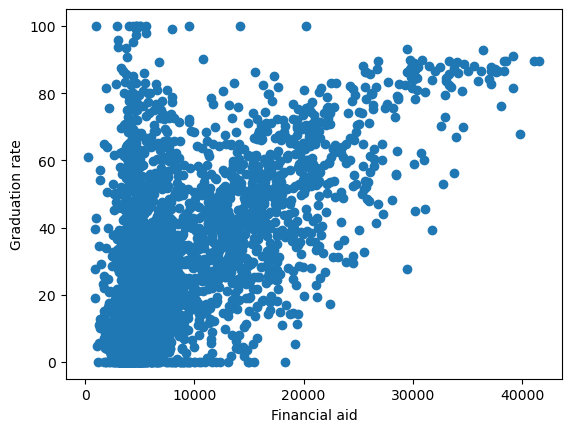

In [18]:
plt.scatter(data_1.aid_value, data_1.grad_100_value)
plt.xlabel('Financial aid')
plt.ylabel('Graduation rate')
plt.show()

In [ ]:
X = data_1.aid_value.values.reshape(-1, 1)

In [ ]:
X[:5]

In [ ]:
X.shape

In [ ]:
y = data_1.grad_100_value

In [ ]:
col_mask=data_1.isnull().any(axis=0) 
col_mask

In [ ]:
row_mask=data_1.isnull().any(axis=1)
row_mask

In [ ]:
data_1.loc[row_mask,col_mask]

In [ ]:
data_1 = data_1.drop(['endow_percentile'], axis = 1)

In [ ]:
data_1.loc[row_mask,col_mask]

In [ ]:
data_1.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

In [ ]:
y_pred = model.predict(X)
print(y_pred.shape)

In [ ]:
# Now getting how many grad_100 are more than 50 and greater than 100

data_of_graduates = list(data_1["grad_100"])
grad = list(data_1["grad_100_rate"])
greater_50 = 0
greater_100 = 0

for i in data_of_graduates:
    if i < 100:
        greater_50+=1
    else:
        greater_100+=1
        
print(greater_100)
print(greater_50)

y=[greater_100,greater_50]
x=["greater_100","greater_50"]

plt.bar(x,y)
plt.show()

In [ ]:
# Here we are visualizing grad_100 rate that are more than 0 and less than 10 and grad_100 rate greater than 10

data_of_graduates = list(data_1["grad_100"])
percentage_of_graduates = list(data_1["grad_100_rate"])
greater_0 = 0
greater_10 = 0

for i in percentage_of_graduates:
    if i < 10:
        greater_0+=1
    else:
        greater_10+=1
        
print(greater_0)
print(greater_10)

y=[greater_10,greater_50]
x=["greater_than_0%_and less than 10","greater_than_10%"]

plt.bar(x,y)
plt.show()

In [ ]:
# Now getting how many grad_150 are more than 50 and greater than 100

data_of_graduates = list(data_1["grad_150"])
percentage_of_graduates = list(data_1["grad_150_rate"])
greater_0 = 0
greater_60 = 0

for i in data_of_graduates:
    if i < 60:
        greater_0+=1
    else:
        greater_60+=1
        
print(greater_60)
print(greater_0)

y=[greater_60,greater_0]
x=["grad_comp_150%_>_than_60","grad_comp_150%_>_than_0"]

plt.bar(x,y)
plt.show()

In [ ]:
# Now getting how many grad_150 percentage are more than 10 and less than 10

data_of_graduates = list(data_1["grad_150"])
percentage_of_graduates = list(data_1["grad_150_rate"])
greater_0 = 0
greater_10 = 0

for i in percentage_of_graduates:
    if i < 10:
        greater_0+=1
    else:
        greater_10+=1
        
print(greater_10)
print(greater_0)

y=[greater_10,greater_0]
x=["grad_comp_ratio_>_than_10","grad_comp_ratio_>_than_0"]

plt.bar(x,y)
plt.show()

In [ ]:

data_1 = data_1.drop(columns=["id_number","unitid"])

data_1.head()


In [ ]:
data = pd.get_dummies(data_1)

data.head()

In [ ]:
# Now we will apply linear regression and logistic regression model 
# on the above four different parameters that are grad_150,grad_100 and there percentage columns as prediction variables and others as X 
# we will be dropping the first two columns as they are just codes 


x = data.iloc[:,:-5]

y = data_1.iloc[:,-4]

x_train = data.iloc[:500000,:-5]

y_train = data_1.iloc[:500000,-4]


x_test = data.iloc[500000:,:-5]

y_test = data_1.iloc[500000:,-4]



linear_regression = LinearRegression()
logistic = LogisticRegression()

# Applying linear regression and logistic regression on graduation number finished in 100 percent estimated time

linear_regression.fit(x_train,y_train)

print("Score of linear model ",linear_regression.score(x,y))


In [ ]:
x = data.iloc[:,:-5]

y = data_1.iloc[:,-3]

x_train = data.iloc[:500000,:-5]

y_train = data_1.iloc[:500000,-3]


x_test = data.iloc[500000:,:-5]

y_test = data_1.iloc[500000:,-3]



linear_regression = LinearRegression()
logistic = LogisticRegression(solver='liblinear')

# Applying linear regression and logistic regression on graduation number finished in 100 percent estimated time

linear_regression.fit(x_train,y_train)

print("Score of linear model ",linear_regression.score(x,y))


In [ ]:

x = data.iloc[:,:-5]

y = data_1.iloc[:,-2]

x_train = data.iloc[:500000,:-5]

y_train = data_1.iloc[:500000,-2]


x_test = data.iloc[500000:,:-5]

y_test = data_1.iloc[500000:,-2]


linear_regression = LinearRegression()
logistic = LogisticRegression(solver='liblinear')

# Applying linear regression and logistic regression on graduation number finished in 100 percent estimated time


linear_regression.fit(x_train,y_train)

print("Score of linear model ",linear_regression.score(x,y))


In [ ]:
x = data.iloc[:,:-5]

y = data_1.iloc[:,-1]

x_train = data.iloc[:500000,:-5]

y_train = data_1.iloc[:500000,-1]


x_test = data.iloc[500000:,:-5]

y_test = data_1.iloc[500000:,-1]


linear_regression = LinearRegression()
logistic = LogisticRegression(solver='liblinear')

# Applying linear regression and logistic regression on graduation number finished in 100 percent estimated time
linear_regression.fit(x_train,y_train)

print("Score of linear model ",linear_regression.score(x,y))
